In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## data loading
data = pd.read_csv("/home/gray/Downloads/integratedbudget_genre_production.csv")

In [3]:
pd.set_option('display.max_columns', None)  
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
data.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,actor1_hashtags,actor2_hashtags,actor3_hashtags,director_hashtags,movie_hashtags,IMDB_ID,genres.1,production_companies.1,budgets,Box Office
0,0,0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,16431,141212,82306,107952,1744076,tt0499549,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'Twentieth Century Fox'}, {'name': '...",237000000,749700000
1,1,1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,1946081,239740,164826,5386,1600,tt0449088,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'Walt Disney Pictures'}, {'name': 'J...",300000000,309404152
2,2,2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes,179939,45185,28352,18433,386542,tt2379713,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'B24'}, {'name': 'Columbia Pictures ...",245000000,208777731


In [4]:
## preparation
threshold_revenue = 10000
threshold_budge = 10000
filter_data = data[(data['budget'] > threshold_budge) & (data['revenue'] > threshold_revenue) & (data['genres.1'] != 'Not Found!')]


In [5]:
## Split genres.1
temp = filter_data['genres.1']
# temp = temp[0].split()[temp[0].split() != "[{'name':"]
genres_list = []
totaltemp = []
for temp in filter_data['genres.1']:
    eachtemp = temp.split()
    newtemp = []
    for each in eachtemp:
        if each != "[{'name':" and each != "{'name':":
            newtemp.append(each[1:-3])
            if each[1:-3] not in genres_list:
                genres_list.append(each[1:-3])
    totaltemp.append(newtemp)
genres_list

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Romance',
 'Mystery',
 'Crime',
 'History',
 'Western',
 'Drama',
 'Sport',
 'Horror',
 'Short',
 'War',
 'Biography',
 'Music',
 'Documentary',
 'Film-Noir',
 'News']

In [6]:
filter_data['filter_genres'] = totaltemp
filter_data.head()

/home/gray/.pyenv/versions/3.5.2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,actor1_hashtags,actor2_hashtags,actor3_hashtags,director_hashtags,movie_hashtags,IMDB_ID,genres.1,production_companies.1,budgets,Box Office,filter_genres
0,0,0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,16431,141212,82306,107952,1744076,tt0499549,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'Twentieth Century Fox'}, {'name': '...",237000000,749700000,"[Action, Adventure, Fantasy, Sci-Fi]"
1,1,1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,1946081,239740,164826,5386,1600,tt0449088,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'Walt Disney Pictures'}, {'name': 'J...",300000000,309404152,"[Action, Adventure, Fantasy]"
2,2,2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes,179939,45185,28352,18433,386542,tt2379713,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'B24'}, {'name': 'Columbia Pictures ...",245000000,208777731,"[Action, Adventure, Thriller]"
3,3,3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan,246520,54633,116258,180973,184743,tt1345836,"[{'name': 'Action'}, {'name': 'Thriller'}]","[{'name': 'Warner Bros.'}, {'name': 'Legendary...",250000000,448130642,"[Action, Thriller]"
4,4,4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney 

In [7]:
## Split production_companies.1
temp = filter_data['production_companies.1']
# temp[0].split("'")
# newtemp = []
# for each in temp[105].split("'"):
#     if each != '[{' and each != 'name' and each != '}, {' and each != '}]'and each != ': ':
#         newtemp.append(each)
# newtemp
production_companies_list = []
totaltemp = []
for temp in filter_data['production_companies.1']:
    eachtemp = temp.split("'")
    newtemp = []
    for each in eachtemp:
        if each != '[{' and each != 'name' and each != '}, {' and each != '}]'and each != ': ':
            newtemp.append(each)
            if each not in production_companies_list:
                production_companies_list.append(each)
    totaltemp.append(newtemp)
production_companies_list

['Twentieth Century Fox',
 'Dune Entertainment',
 'Ingenious Film Partners',
 'Lightstorm Entertainment',
 'Walt Disney Pictures',
 'Jerry Bruckheimer Films',
 'Second Mate Productions',
 'LSG Productions',
 'B24',
 'Columbia Pictures Corporation',
 'Danjaq',
 'Eon Productions',
 'Metro-Goldwyn-Mayer (MGM)',
 'Sony',
 'Warner Bros.',
 'Legendary Entertainment',
 'DC Entertainment',
 'Syncopy',
 'DC Comics',
 'BOT VFX',
 'Marvel Studios',
 'Laura Ziskin Productions',
 'Walt Disney Animation Studios',
 'Heyday Films',
 'Atlas Entertainment',
 'Cruel & Unusual Films',
 'RatPac-Dune Entertainment',
 'Peters Entertainment',
 'Bad Hat Harry Productions',
 'Red Sun Productions Pty. Ltd.',
 'Metro-Goldwyn-Mayer',
 'B22',
 'United Artists',
 'Blind Wink Productions',
 'Infinitum Nihil',
 'Classic Media',
 'Silver Bullet Productions',
 'Walden Media',
 'Ozumi Films',
 'Pakt Media',
 'Silverbell Films',
 'Stillking Films',
 'Paramount Pictures',
 'Moving Picture Company',
 'Hemisphere Media Capit

In [8]:
filter_data['filter_production_companies'] = totaltemp
filter_data.head()

/home/gray/.pyenv/versions/3.5.2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,actor1_hashtags,actor2_hashtags,actor3_hashtags,director_hashtags,movie_hashtags,IMDB_ID,genres.1,production_companies.1,budgets,Box Office,filter_genres,filter_production_companies
0,0,0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,16431,141212,82306,107952,1744076,tt0499549,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'Twentieth Century Fox'}, {'name': '...",237000000,749700000,"[Action, Adventure, Fantasy, Sci-Fi]","[Twentieth Century Fox, Dune Entertainment, In..."
1,1,1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,1946081,239740,164826,5386,1600,tt0449088,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'Walt Disney Pictures'}, {'name': 'J...",300000000,309404152,"[Action, Adventure, Fantasy]","[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,2,2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes,179939,45185,28352,18433,386542,tt2379713,"[{'name': 'Action'}, {'name': 'Adventure'}, {'...","[{'name': 'B24'}, {'name': 'Columbia Pictures ...",245000000,208777731,"[Action, Adventure, Thriller]","[B24, Columbia Pictures Corporation, Danjaq, E..."
3,3,3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan,246520,54633,116258,180973,184743,tt1345836,"[{'name': 'Action'}, {'name': 'Thriller'}]","[{'name': 'Warner Bros.'}, {'name': 'Legendary...",250000000,448130642,"[Action, Thriller]","[Warner Bros., Legendary Entertainment, DC Ent..."
4,4,4,4,260000000,"[{""id"": 28, ""name"": ""Actio

In [22]:
genres_list

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Romance',
 'Mystery',
 'Crime',
 'History',
 'Western',
 'Drama',
 'Sport',
 'Horror',
 'Short',
 'War',
 'Biography',
 'Music',
 'Documentary',
 'Film-Noir',
 'News']

In [9]:
## Plot: genres - revenues
genres_revenue_list = {}

for each in genres_list:
    revenue_list = []
    for eachindex, eachrow in filter_data.iterrows():
        if each in eachrow['filter_genres']:
            revenue_list.append(eachrow['revenue'])
    genres_revenue_list[each] = revenue_list


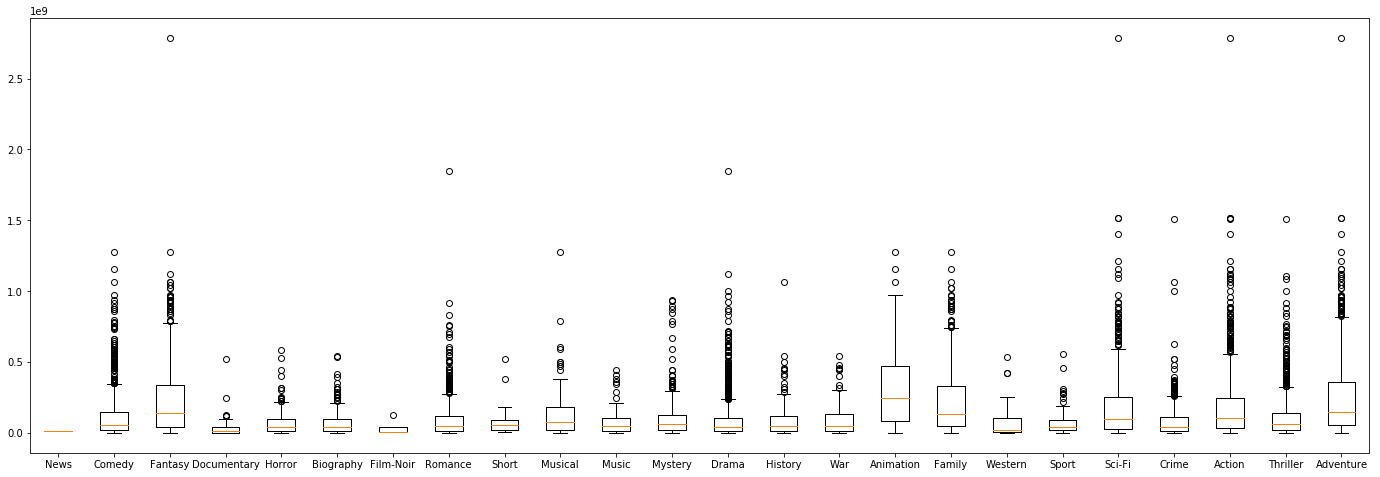

In [10]:
# genres_revenue_list['Action']
this_figure = plt.figure(figsize=(24,8))
plt.boxplot(genres_revenue_list.values())
plt.xticks(list(range(1, len(genres_revenue_list) + 1)), genres_revenue_list.keys())
plt.show()
this_figure.savefig("foo.pdf", bbox_inches='tight')

In [11]:
## Plot: production company - revenues
production_companies_revenue_list = {}

for each in production_companies_list:
    revenue_list = []
    
    for eachindex, eachrow in filter_data.iterrows():
        if each in eachrow['filter_production_companies']:
            revenue_list.append(eachrow['revenue'])
    production_companies_revenue_list[each] = revenue_list


In [12]:
# genres_revenue_list['Action']
this_figure2 = plt.figure(figsize=(240,80))
plt.boxplot(production_companies_revenue_list.values())
plt.xticks(list(range(1, len(production_companies_revenue_list) + 1)), production_companies_revenue_list.keys())
plt.show()
this_figure2.savefig("foo2.pdf", bbox_inches='tight')

In [24]:
## CSV file production
### genres - revenues
statistics_genres_revenues = pd.DataFrame()
for each_name in genres_revenue_list.keys():
#     print(type(each_name))
    s = pd.Series(genres_revenue_list[each_name])
    statistics_genres_revenues[each_name] = s
    print(s.describe())
final_output1 = statistics_genres_revenues.describe()
final_output1.to_csv("output1.csv")

count           1.0
mean     17436509.0
std             NaN
min      17436509.0
25%      17436509.0
50%      17436509.0
75%      17436509.0
max      17436509.0
dtype: float64
count    1.137000e+03
mean     1.169606e+08
std      1.590222e+08
min      2.038000e+04
25%      1.819740e+07
50%      5.946828e+07
75%      1.504838e+08
max      1.274219e+09
dtype: float64
count    4.200000e+02
mean     2.422333e+08
std      2.914598e+08
min      2.038000e+04
25%      4.376683e+07
50%      1.399389e+08
75%      3.407735e+08
max      2.787965e+09
dtype: float64
count    4.700000e+01
mean     4.294912e+07
std      8.466724e+07
min      2.500000e+04
25%      2.620000e+06
50%      1.743651e+07
75%      4.383353e+07
max      5.200000e+08
dtype: float64
count    3.370000e+02
mean     6.892774e+07
std      7.759350e+07
min      2.200000e+04
25%      1.750737e+07
50%      4.401737e+07
75%      9.713869e+07
max      5.853490e+08
dtype: float64
count    2.120000e+02
mean     7.414472e+07
std      9.205033

In [14]:
### genres - revenues
statistics_production_companies_revenues = pd.DataFrame()
for each_name in production_companies_revenue_list.keys():
#     print(type(each_name))
    s = pd.Series(production_companies_revenue_list[each_name])
    statistics_production_companies_revenues[each_name] = s
final_output2 = statistics_production_companies_revenues.describe()
final_output2.to_csv("output2.csv")

In [23]:
# pd.Series(genres_revenue_list['News']).describe()
# len(final_output2.columns)
genres_revenue_list.keys()

dict_keys(['News', 'Comedy', 'Fantasy', 'Documentary', 'Horror', 'Biography', 'Film-Noir', 'Romance', 'Short', 'Musical', 'Music', 'Mystery', 'Drama', 'History', 'War', 'Animation', 'Family', 'Western', 'Sport', 'Sci-Fi', 'Crime', 'Action', 'Thriller', 'Adventure'])